<a href="https://colab.research.google.com/github/nnajeh/Aireline-Passengers-Prediction-LSTM/blob/master/aireline-predict-regression-lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Load libraries
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load data
dataframe = pandas.read_csv('/content/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# fix random seed for reproducibility
numpy.random.seed(7)

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)




In [50]:

# split dataset into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
  

95 48


In [0]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [52]:
# create and fit the LSTM network
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/200
 - 1s - loss: 89015.6920
Epoch 2/200
 - 0s - loss: 62993.2618
Epoch 3/200
 - 0s - loss: 48139.2354
Epoch 4/200
 - 0s - loss: 33408.6734
Epoch 5/200
 - 0s - loss: 18890.3364
Epoch 6/200
 - 0s - loss: 8136.3697
Epoch 7/200
 - 0s - loss: 2991.1422
Epoch 8/200
 - 0s - loss: 1411.2164
Epoch 9/200
 - 0s - loss: 1103.5428
Epoch 10/200
 - 0s - loss: 1067.6730
Epoch 11/200
 - 0s - loss: 1071.3586
Epoch 12/200
 - 0s - loss: 1062.1516
Epoch 13/200
 - 0s - loss: 1075.7723
Epoch 14/200
 - 0s - loss: 1062.5514
Epoch 15/200
 - 0s - loss: 1076.3082
Epoch 16/200
 - 0s - loss: 1064.4499
Epoch 17/200
 - 0s - loss: 1056.9550
Epoch 18/200
 - 0s - loss: 1059.8161
Epoch 19/200
 - 0s - loss: 1056.0496
Epoch 20/200
 - 0s - loss: 1053.6500
Epoch 21/200
 - 0s - loss: 1044.3475
Epoch 22/200
 - 0s - loss: 1039.9201
Epoch 23/200
 - 0s - loss: 1043.2062
Epoch 24/200
 - 0s - loss: 1046.6390
Epoch 25/200
 - 0s - loss: 1047.6049
Epoch 26/200
 - 0s - loss: 1045.1318
Epoch 27/200
 - 0s - loss: 1036.7739
Epoch

In [53]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( 'Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( 'Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 610.12 MSE (24.70 RMSE)
Test Score: 2596.16 MSE (50.95 RMSE)


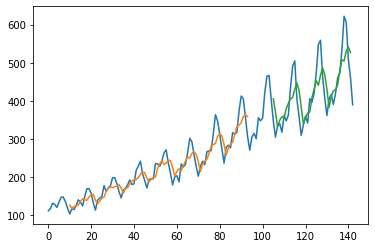

In [54]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()